In [170]:
import seaborn as sns
from seaborn import objects as so
import matplotlib.pyplot as plt
from matplotlib import style

import numpy as np
import pandas as pd

In [2]:
import sys
sys.path.append("..")

import src.analysis.plotting_utils as pluto
from src.analysis.apogee_analysis import subgiants


In [171]:
sty = {'font.family': ['serif'],
       # 'font.serif': ['times'],
       'axes.facecolor': 'w',
       'axes.edgecolor': 'k',
       'axes.labelcolor': 'k',
       'axes.grid': False,
       'text.usetex': True,
       'mathtext.fontset': 'custom',
       'text.latex.preamble': '\\usepackage{amsmath,txfonts}',
       'xtick.bottom': True,
       'xtick.top': True,
       'ytick.left': True,
       'ytick.right': True,
       'xtick.direction': 'in',
       'ytick.direction': 'in',
       'text.color': 'k',
       'xtick.color': 'k',
       'ytick.color': 'k',
       'legend.frameon': False,
       'figure.figsize': [3,3],
       'figure.dpi': 500,
       'legend.numpoints': 1
      }

style.use("journal.mplstyle")

sns.set_style(sty)

colors = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', 
          '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']

sns.set_palette(colors)


In [182]:
def sns_get_leg(p, ax, loc=None):
    fig = p._figure
    leg = fig.legends.pop(0)

    leg = ax.legend(leg.legendHandles, [t.get_text() for t in leg.texts], 
                    loc=loc)
    
    return leg

In [186]:
def fancy_legend(p, ax):

    leg = sns_get_leg(p, ax, "lower right")
    leg.handlelength = 0
    leg.columnspacing = 0.8
    leg.set_frame_on(False)

    for i in range(len(leg.get_texts())):
        leg.get_texts()[i].set_color(colors[i % len(colors)])
        leg.legendHandles[i].set_visible(False)
        
    return p

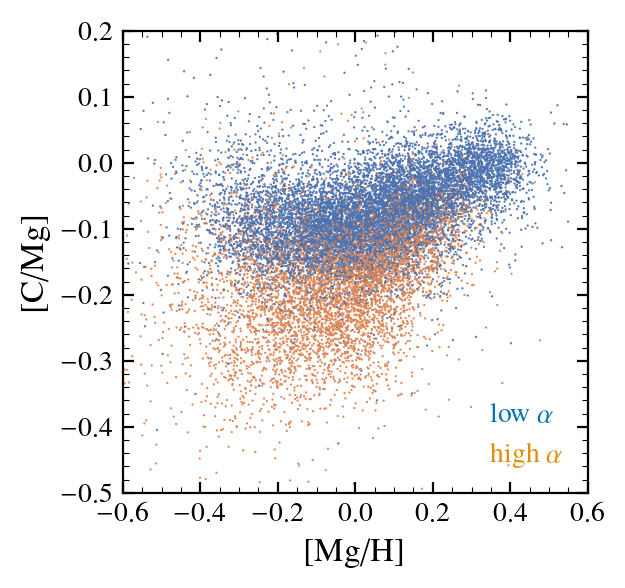

In [173]:
subgiants["ha_label"] = np.where(subgiants.high_alpha, "high $\\alpha$", "low $\\alpha$")

fig, ax = plt.subplots()
p = (
    so.Plot(
        subgiants, x="MG_H", y="C_MG", color="ha_label"
    )
    .add(so.Dot(pointsize=0.3))
    .limit(x=(-0.6, 0.6), y=(-0.5, 0.2))
    .label(
        x="[Mg/H]",
        y="[C/Mg]",
        color=""
    )
    .scale(x=so.Continuous().tick(every=0.2))
    .on(ax)
    .plot()
)

fancy_legend(p);

In [ ]:
import matplotlib as mpl

In [256]:
norm = mpl.colors.Normalize(-0.4, 0.3)
cm = sns.color_palette("flare_r", as_cmap=True)

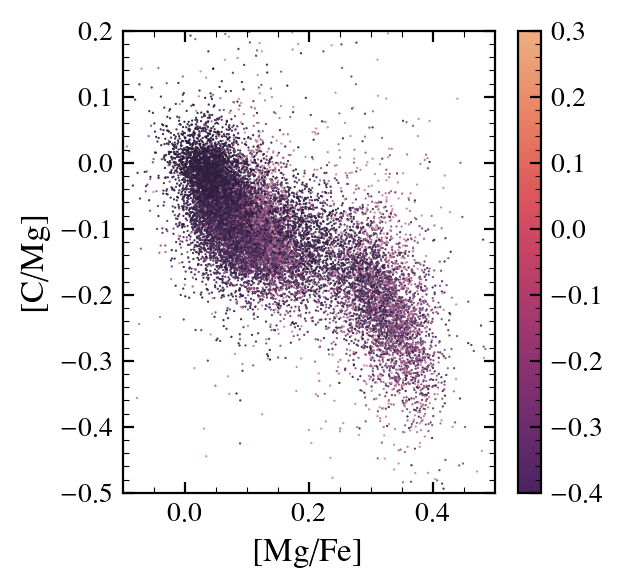

In [261]:
fig, ax = plt.subplots()

subgiants["color"] = cm(norm(subgiants["MG_H"]))

p = (
    so.Plot(
        subgiants, x="MG_FE", y="C_MG", color="color"
    )
    .add(so.Dot(pointsize=0.3), legend=False)
    .limit(x=(-0.1, 0.5), y=(-0.5, 0.2))
    .label(
        x="[Mg/Fe]",
        y="[C/Mg]",
        color=""
    )
    .scale(x=so.Continuous().tick(every=0.2), 
           norm=(-0.4, 0.3))
    .layout(size=(3,3))
    .on(ax)
    .plot()
)

fig = p._figure
mapp = mpl.cm.ScalarMappable(norm=norm, cmap=cm)
plt.colorbar(mapp, ax=ax, cax=)